In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

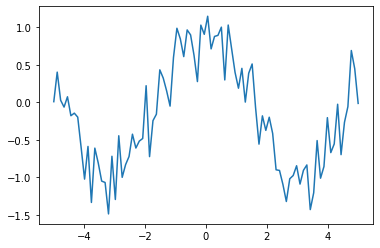

In [3]:
# create a random 1d signal

t = np.linspace(-5, 5, 90)
x = np.cos(t)
x = x+np.random.randn(len(t))*0.3
plt.plot(t, x)

filter : [0.33, 0.33, 0.33]
                 X
        
length of curve = M
length of filter = n
At every position we are performaing - n multiplcations and n additions
2n calculations at each point

90 90


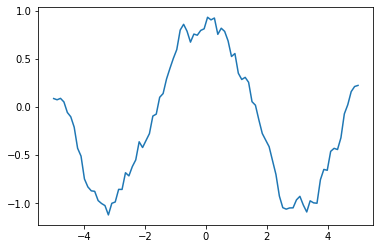

In [4]:
# smoothing using convolution with a filter of ones
window_length = 5
sw = np.ones(window_length)
sw = sw/sw.sum()
y = np.convolve(sw, x, mode='same')
print(len(y), len(t))
plt.plot(t[0:len(y)], y) # Note that y is smaller than x

lst = np.array([1, 2, 3, 2, 1])
lst = 

[0.        0.0190983 0.0690983 0.1309017 0.1809017 0.2       0.1809017
 0.1309017 0.0690983 0.0190983 0.       ]


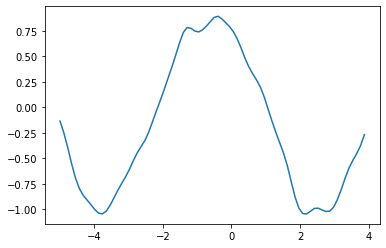

In [8]:
window_length = 11
sw = np.hanning(window_length)
sw = sw/sw.sum()
print(sw)
y = np.convolve(sw, x, mode='valid')
plt.plot(t[0:len(y)], y) # Note that y is smaller than x

# similarly there are 'hamming', 'bartlett', 'blackman' etc.

[0.        0.0190983 0.0690983 0.1309017 0.1809017 0.2       0.1809017
 0.1309017 0.0690983 0.0190983 0.       ]


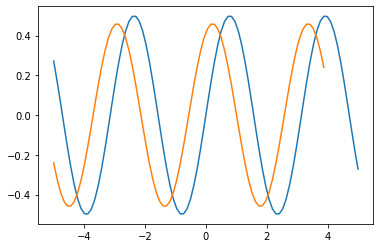

In [11]:
'''
Inclass activity:

Apply Hanning filter to a 1D signal sin(t)*cos(t). The range of t is 
same as the one in the example above. Use a window length of 11. 
'''

t = np.linspace(-5, 5, 90)
y = np.sin(t)*np.cos(t) # +r
window_length = 11
sw = np.hanning(window_length)
sw = sw/sw.sum()
print(sw)
y2 = np.convolve(sw, y, mode='valid')
plt.plot(t, y)
plt.plot(t[0:len(y2)], y2) # Note that y is smaller than x

<class 'tuple'>
(22050, array([ 16,  16,  16, ..., 766, 904, 697], dtype=int16)) 661500


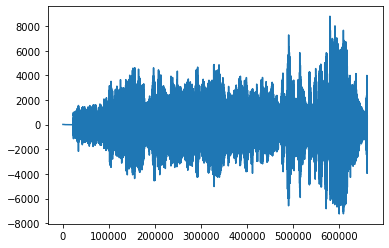

In [12]:
# reading audio file and smoothing
# https://www2.cs.uic.edu/~i101/SoundFiles/

from scipy.io import wavfile

x = wavfile.read('PinkPanther30.wav')
print(type(x))
print(x, len(x[1]))
plt.plot(x[1])

6917.090909090909 -5843.09090909091


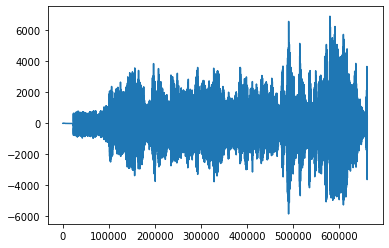

In [13]:
# smooth the audio file
window_length = 11
sw = np.ones(window_length)
sw = sw/sw.sum()
y = np.convolve(sw, x[1], mode='same')
plt.plot(y) # Note that y is smaller than x

print(y.max(), y.min())

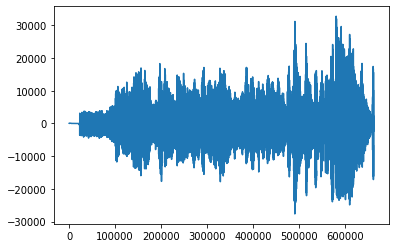

In [16]:
scaled = np.int16(y/np.max(np.abs(y)) * 32767)
plt.plot(scaled)
wavfile.write('smoothed_PinkPanther30_22.wav', 44100, scaled)

In [15]:
lst = np.array([1, 3, 5, 4, 6])
lst = (lst/np.max(lst)) * 32767
print(lst)

[ 5461.16666667 16383.5        27305.83333333 21844.66666667
 32767.        ]
